# I) Etude de la fréquentation des lignes Paris-Bordeaux


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
parisbordeaux = pd.read_csv('https://raw.githubusercontent.com/mdlbm/SNCF-Immobilier/Mats/parisbordeaux.csv')

In [2]:
#tri des données de circulation par période
parisbordeaux = parisbordeaux.sort_values(['Période'])
parisbordeaux['Nombre de circulations effectives'] = (parisbordeaux['Nombre de circulations prévues'])-(parisbordeaux['Nombre de trains annulés']) #Création de la varaible nombre de circulations effectives
parisbordeaux['Service'] = parisbordeaux['Service'].replace(np.nan,'LGV') #Remplacement des valeurs NaN par la valeur LGV
parisbordeaux

,Année,Mois,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet (min),Nombre de circulations prévues,Nombre de trains annulés,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ (min),Retard moyen de tous les trains au départ (min),Nombre de trains en retard à l'arrivée,Retard moyen des trains en retard à l'arrivée (min),Retard moyen de tous les trains à l'arrivée (min),Période,Nombre de circulations effectives
2,2015,1.0,National,PARIS MONTPARNASSE,BORDEAUX ST JEAN,208.685668,615.0,1.0,19.0,17.684211,0.693811,58.0,37.655172,4.705212,2015-01,614.0
3,2015,2.0,National,PARIS MONTPARNASSE,BORDEAUX ST JEAN,210.177083,577.0,1.0,22.0,19.772727,0.949653,44.0,30.772727,4.307292,2015-02,576.0
8,2015,3.0,National,PARIS MONTPARNASSE,BORDEAUX ST JEAN,207.714729,645.0,0.0,8.0,21.375000,0.337984,27.0,32.740741,2.040310,2015-03,645.0
20,2015,4.0,National,PARIS MONTPARNASSE,BORDEAUX ST JEAN,207.685127,632.0,0.0,15.0,13.066667,0.458861,42.0,35.761905,3.128165,2015-04,632.0
1,2015,5.0,National,PARIS MONTPARNASSE,BORDEAUX ST JEAN,211.077044,637.0,1.0,10.0,18.100000,0.413522,34.0,43.676471,2.451258,2015-05,636.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2020,2.0,LGV,PARIS MONTPARNASSE,BORDEAUX ST JEAN,147.564789,716.0,6.0,562.0,2.628410,1.973075,56.0,21.617262,2.226667,2020-02,710.0
61,2020,3.0,LGV,PARIS MONTPARNASSE,BORDEAUX ST JEAN,146.943946,501.0,55.0,348.0,2.989368,2.204596,77.0,24.003247,5.401457,2020-03,446.0
59,2020,4.0,LGV,PARIS MONTPARNASSE,BORDEAUX ST JEAN,153.891892,92.0,55.0,35.0,7.185238,6.765766,20.0,22.676667,15.250000,2020-04,37.0
64,2020,5.0,LGV,PARIS MONTPARNASSE,BORDEAUX ST JEAN,145.522222,325.0,55.0,220.0,2.131212,1.648704,36.0,26.245833,4.363333,2020-05,270.0


Text(25, 100, 'Mise en service de la ligne LGV')

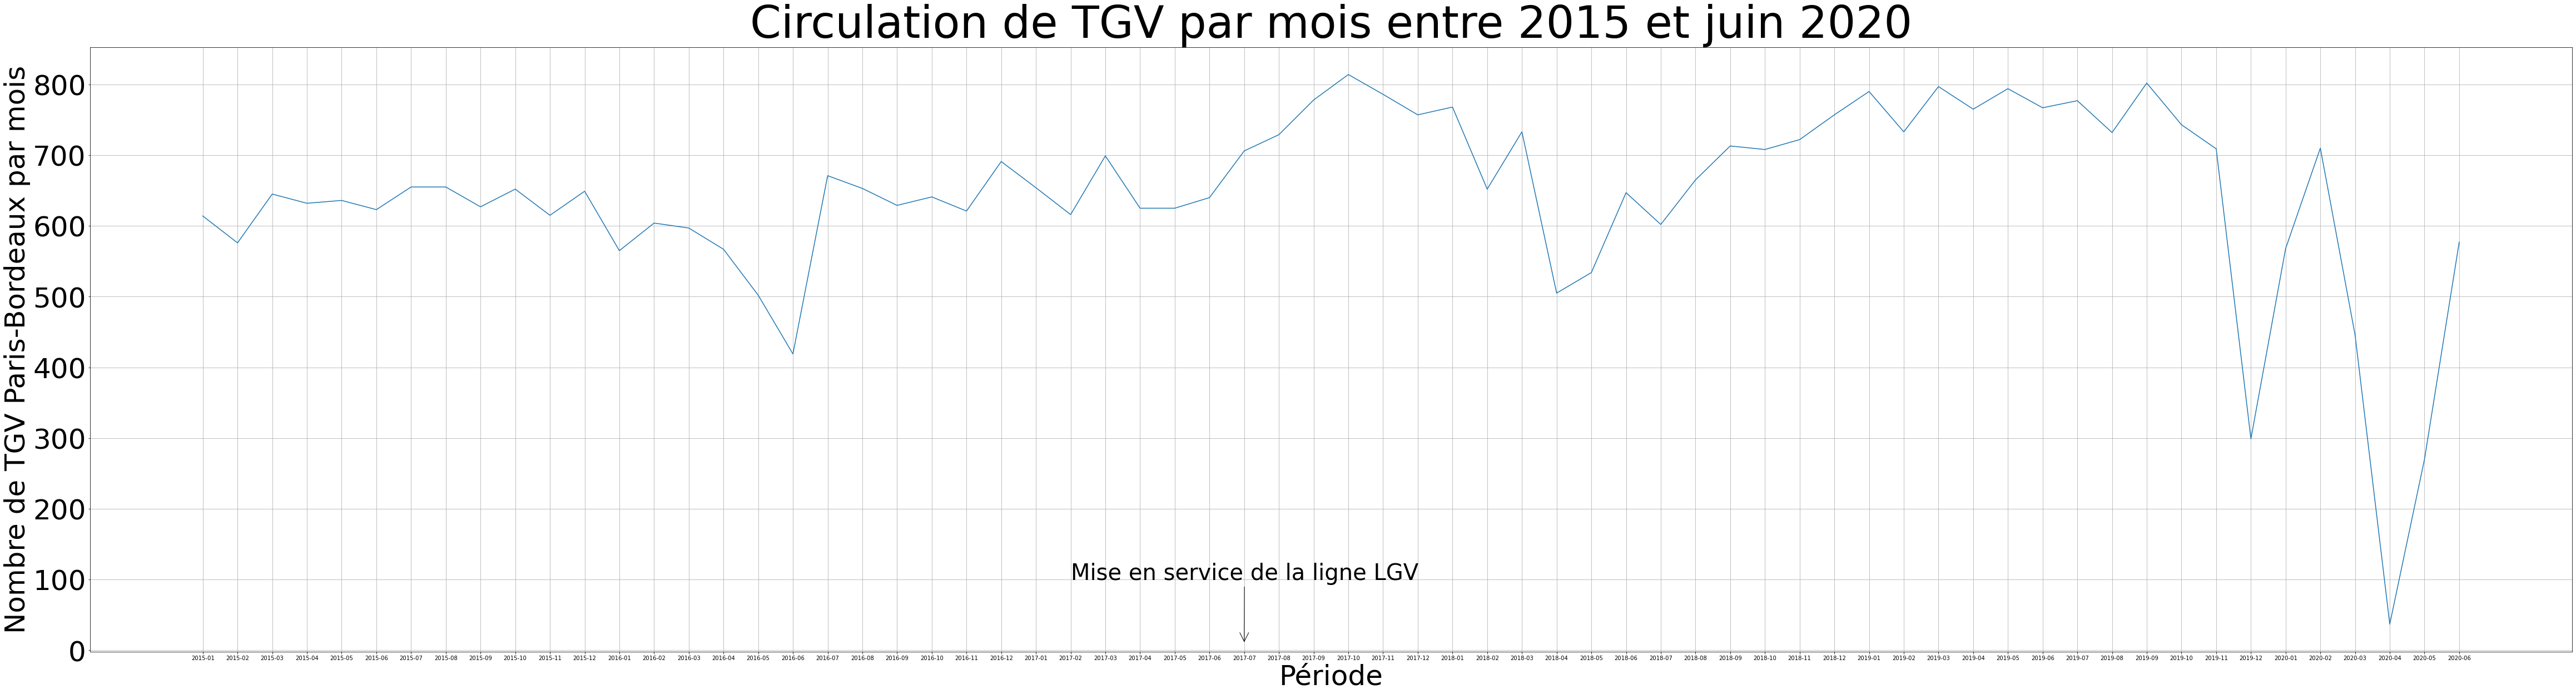

In [3]:
plt.figure(figsize=(80,20))
plt.plot(parisbordeaux['Période'],parisbordeaux['Nombre de circulations effectives'])
plt.title('Circulation de TGV par mois entre 2015 et juin 2020',size = 80)
plt.xlabel('Période', size = 50)
plt.ylabel('Nombre de TGV Paris-Bordeaux par mois', size = 50)
plt.grid() 

plt.yticks(size = 50)
plt.annotate('Mise en service de la ligne LGV', xy=(30, 10),
xytext=(25,100),
arrowprops=dict(facecolor='black',
arrowstyle='->'), size=40)


<ipython-input-4-38d2cc2ca4ed>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  moyenne_circulation_service = [parisbordeaux[parisbordeaux['Service']=='National']['Nombre de circulations effectives'].mean(),parisbordeaux[parisbordeaux['Service']=='LGV'][parisbordeaux['Période']<'2019-09']['Nombre de circulations effectives'].mean()]


<BarContainer object of 2 artists>

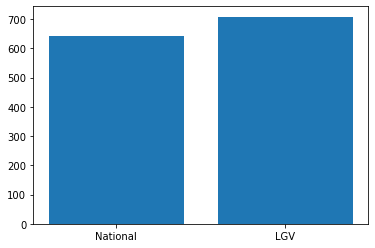

In [4]:
moyenne_circulation_service = [parisbordeaux[parisbordeaux['Service']=='National']['Nombre de circulations effectives'].mean(),parisbordeaux[parisbordeaux['Service']=='LGV'][parisbordeaux['Période']<'2019-09']['Nombre de circulations effectives'].mean()]
plt.bar(['National','LGV'],moyenne_circulation_service)

En prenant soin d'enlever les données que la crise sanitaire pouvait altérer, on voit donc que la ligne LGV a fait augmenter le nombre de trajet moyen par mois d'environ 65.

<Figure size 432x288 with 0 Axes>

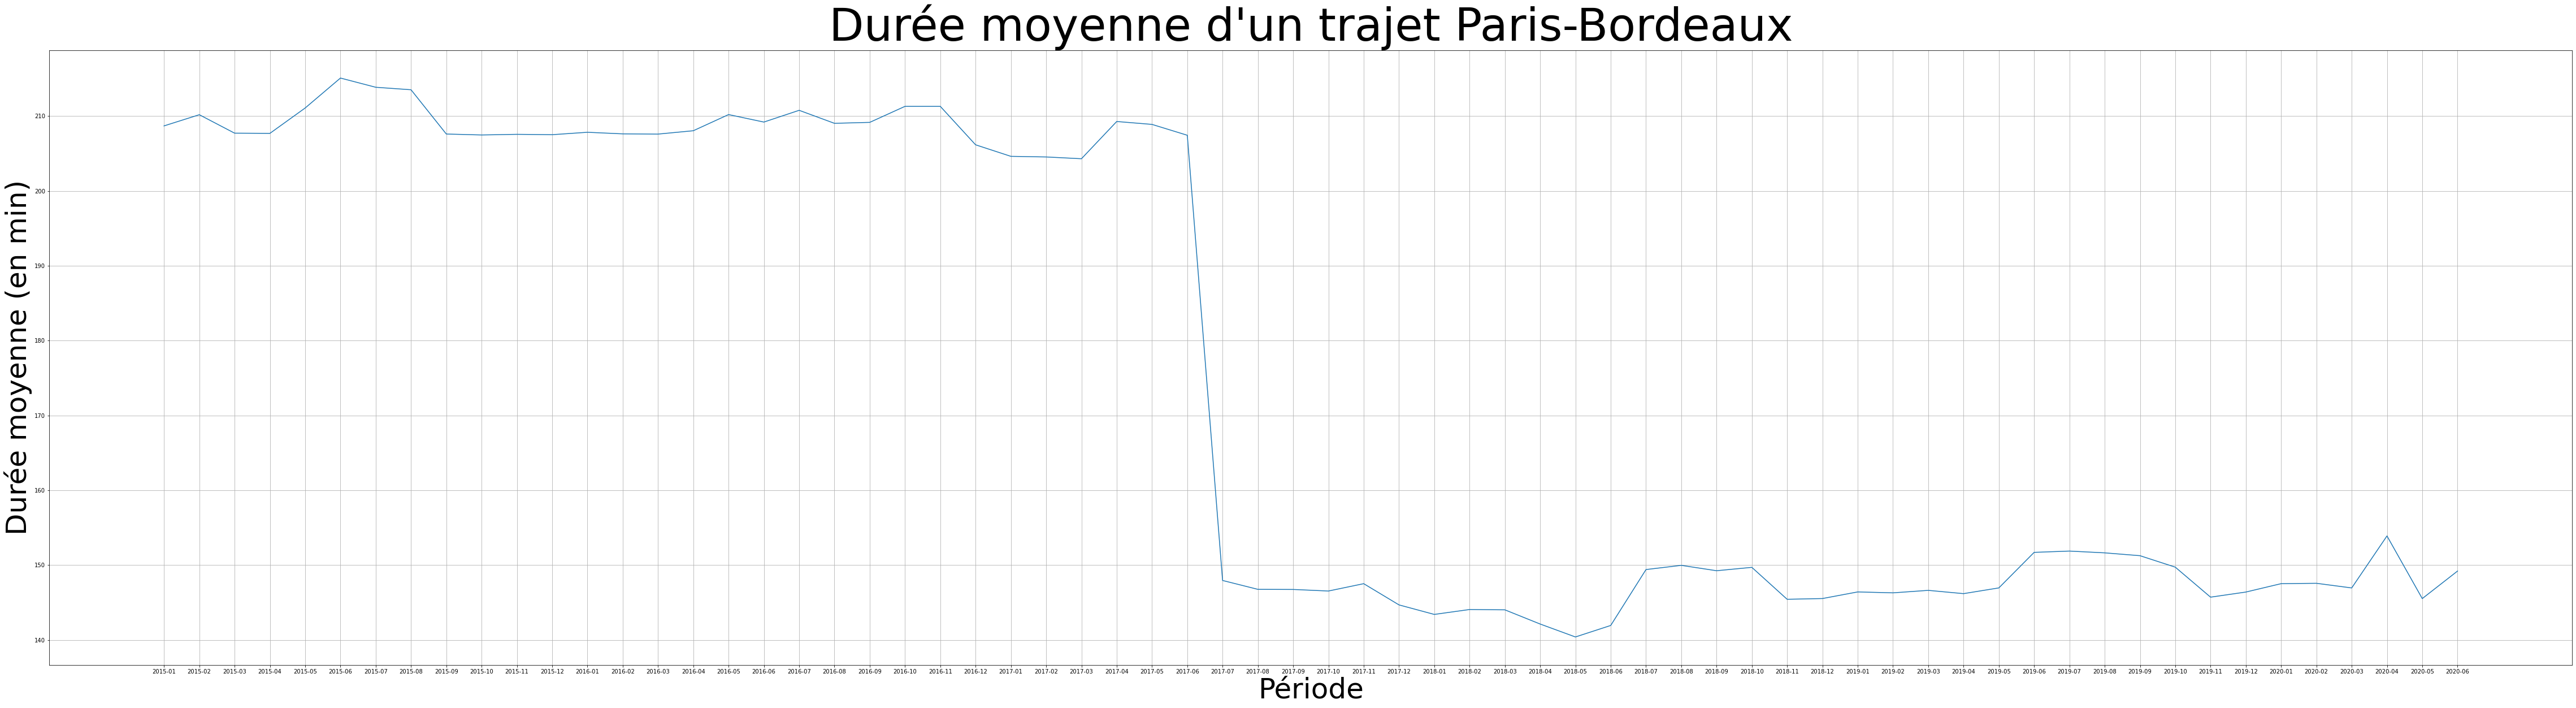

In [5]:
plt.clf()
plt.figure(figsize=(80,20))
plt.plot(parisbordeaux['Période'],parisbordeaux['Durée moyenne du trajet (min)'])
plt.title("Durée moyenne d'un trajet Paris-Bordeaux",size = 80)
plt.xlabel('Période', size = 50)
plt.ylabel('Durée moyenne (en min)', size = 50)
plt.grid() 



In [6]:
#J'ai essayé, sans succès, de faire une fonction pour ne pas avoir  à refaire ce protocole
bordeauxparis = pd.read_csv('https://raw.githubusercontent.com/mdlbm/SNCF-Immobilier/Mats/bordeauxparis.csv')
bordeauxparis = bordeauxparis.sort_values(['Période'])
bordeauxparis['Nombre de circulations effectives'] = (bordeauxparis['Nombre de circulations prévues'])-(bordeauxparis['Nombre de trains annulés']) #Création de la varaible nombre de circulations effectives
bordeauxparis['Service'] = bordeauxparis['Service'].replace(np.nan,'LGV') #Remplacement des valeurs NaN par la valeur LGV
bordeauxparis

,Année,Mois,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet (min),Nombre de circulations prévues,Nombre de trains annulés,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ (min),Retard moyen de tous les trains au départ (min),Nombre de trains en retard à l'arrivée,Retard moyen des trains en retard à l'arrivée (min),Retard moyen de tous les trains à l'arrivée (min),Période,Nombre de circulations effectives
45,2015,1.0,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,210.638462,653.0,3.0,62.0,25.016129,2.969231,63.0,60.396825,5.683077,2015-01,650.0
36,2015,2.0,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,211.197411,619.0,1.0,53.0,19.981132,2.370550,53.0,42.169811,3.745955,2015-02,618.0
41,2015,3.0,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,209.769795,682.0,0.0,70.0,13.914286,1.966276,44.0,40.113636,3.431085,2015-03,682.0
31,2015,4.0,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,209.726172,663.0,2.0,103.0,17.796117,3.537065,47.0,41.914894,3.670197,2015-04,661.0
44,2015,5.0,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,211.434389,663.0,0.0,121.0,14.140496,3.285068,39.0,38.358974,1.941176,2015-05,663.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2020,2.0,LGV,BORDEAUX ST JEAN,PARIS MONTPARNASSE,145.998682,765.0,6.0,326.0,7.165440,2.792885,78.0,30.495513,2.751274,2020-02,759.0
59,2020,3.0,LGV,BORDEAUX ST JEAN,PARIS MONTPARNASSE,142.476596,519.0,49.0,192.0,6.777344,2.544468,81.0,28.860082,6.171206,2020-03,470.0
61,2020,4.0,LGV,BORDEAUX ST JEAN,PARIS MONTPARNASSE,152.107143,107.0,51.0,31.0,2.134409,0.960119,42.0,18.363889,17.791071,2020-04,56.0
64,2020,5.0,LGV,BORDEAUX ST JEAN,PARIS MONTPARNASSE,143.230159,301.0,49.0,111.0,4.492342,1.763492,28.0,33.616667,1.776257,2020-05,252.0


Text(25, 100, 'Mise en service de la ligne LGV')

<Figure size 432x288 with 0 Axes>

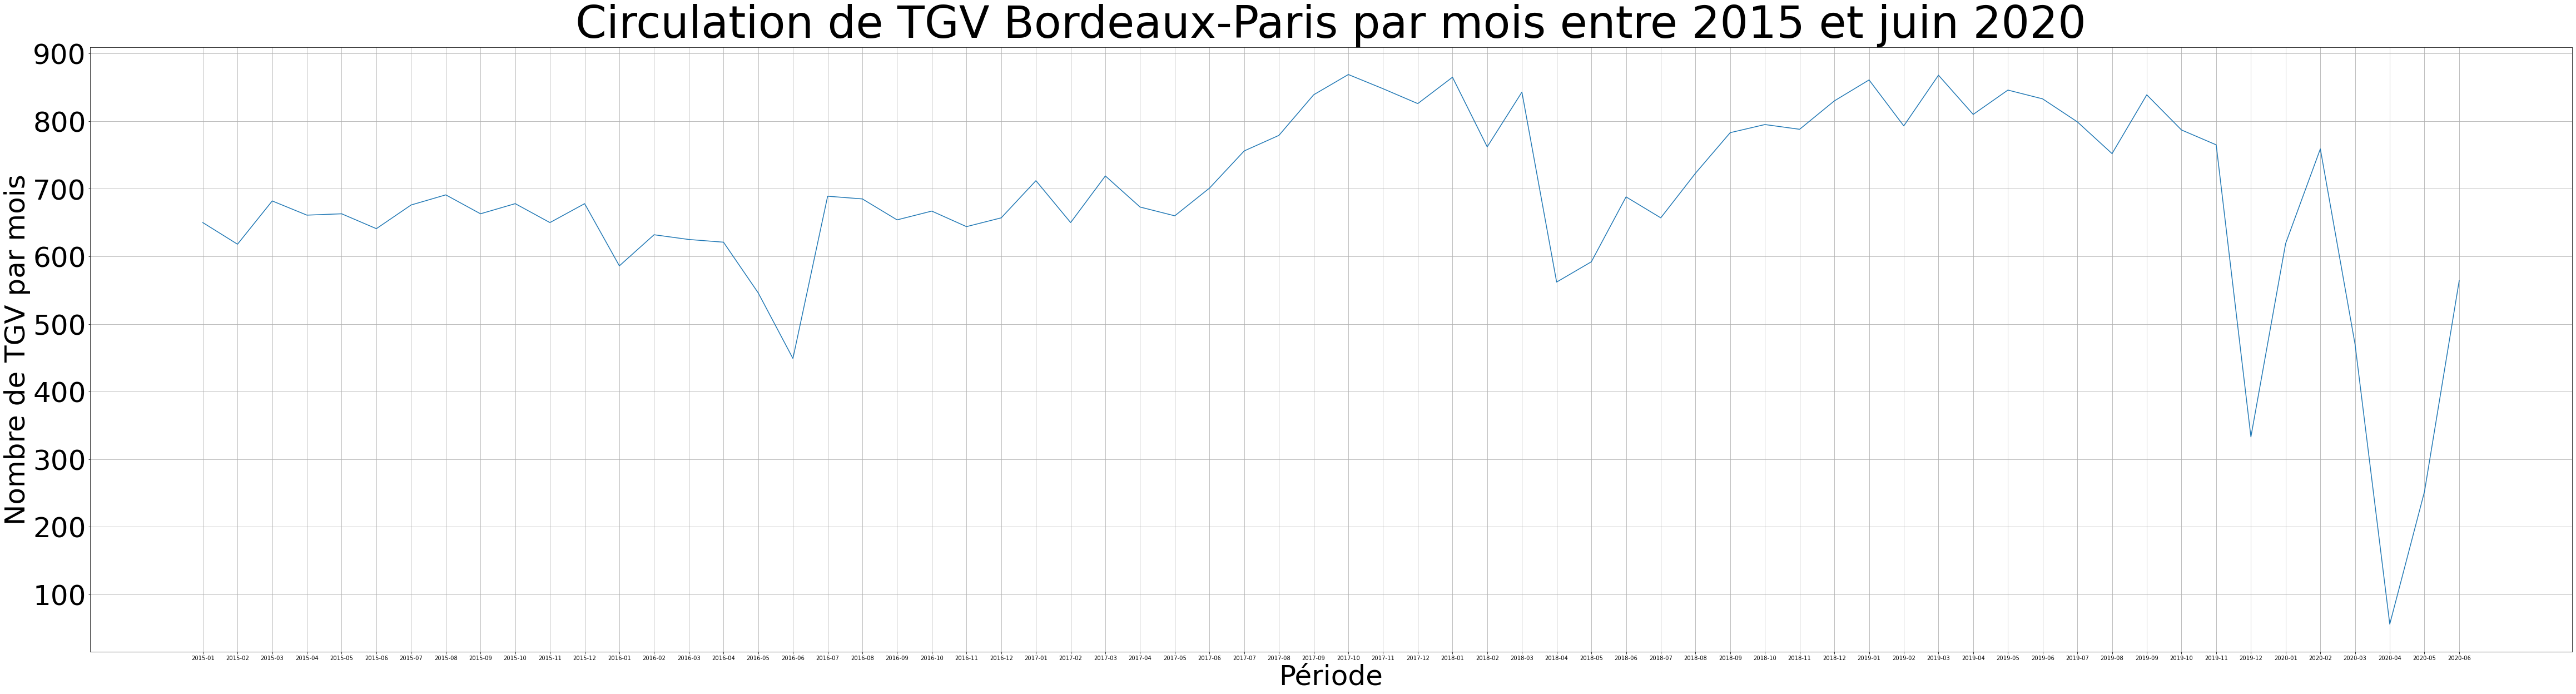

In [7]:
plt.clf() 
 
plt.figure(figsize=(80,20))
plt.plot(bordeauxparis['Période'],bordeauxparis['Nombre de circulations effectives'])
plt.title('Circulation de TGV Bordeaux-Paris par mois entre 2015 et juin 2020',size = 80)
plt.xlabel('Période', size = 50)
plt.ylabel('Nombre de TGV par mois', size = 50)
plt.grid() 

plt.yticks(size = 50)
plt.annotate('Mise en service de la ligne LGV', xy=(30, 10),xytext=(25,100),arrowprops=dict(facecolor='black',arrowstyle='->'), size=40)

<ipython-input-8-852ac74f41c7>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  moyenne_circulation_service_bordeauxparis = [bordeauxparis[bordeauxparis['Service']=='National']['Nombre de circulations effectives'].mean(),bordeauxparis[bordeauxparis['Service']=='LGV'][bordeauxparis['Période']<'2019-09']['Nombre de circulations effectives'].mean()]


[678.8333333333334, 772.5]

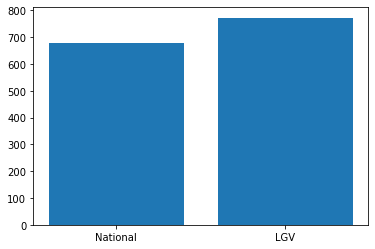

In [8]:
moyenne_circulation_service_bordeauxparis = [bordeauxparis[bordeauxparis['Service']=='National']['Nombre de circulations effectives'].mean(),bordeauxparis[bordeauxparis['Service']=='LGV'][bordeauxparis['Période']<'2019-09']['Nombre de circulations effectives'].mean()]
plt.bar(['National','LGV'],moyenne_circulation_service_bordeauxparis)
moyenne_circulation_service_bordeauxparis

En prenant soin d'enlever les données que la crise sanitaire pouvait altérer, on voit donc que la ligne LGV a fait augmenter le nombre de trajet moyen par mois d'environ 94.

<Figure size 432x288 with 0 Axes>

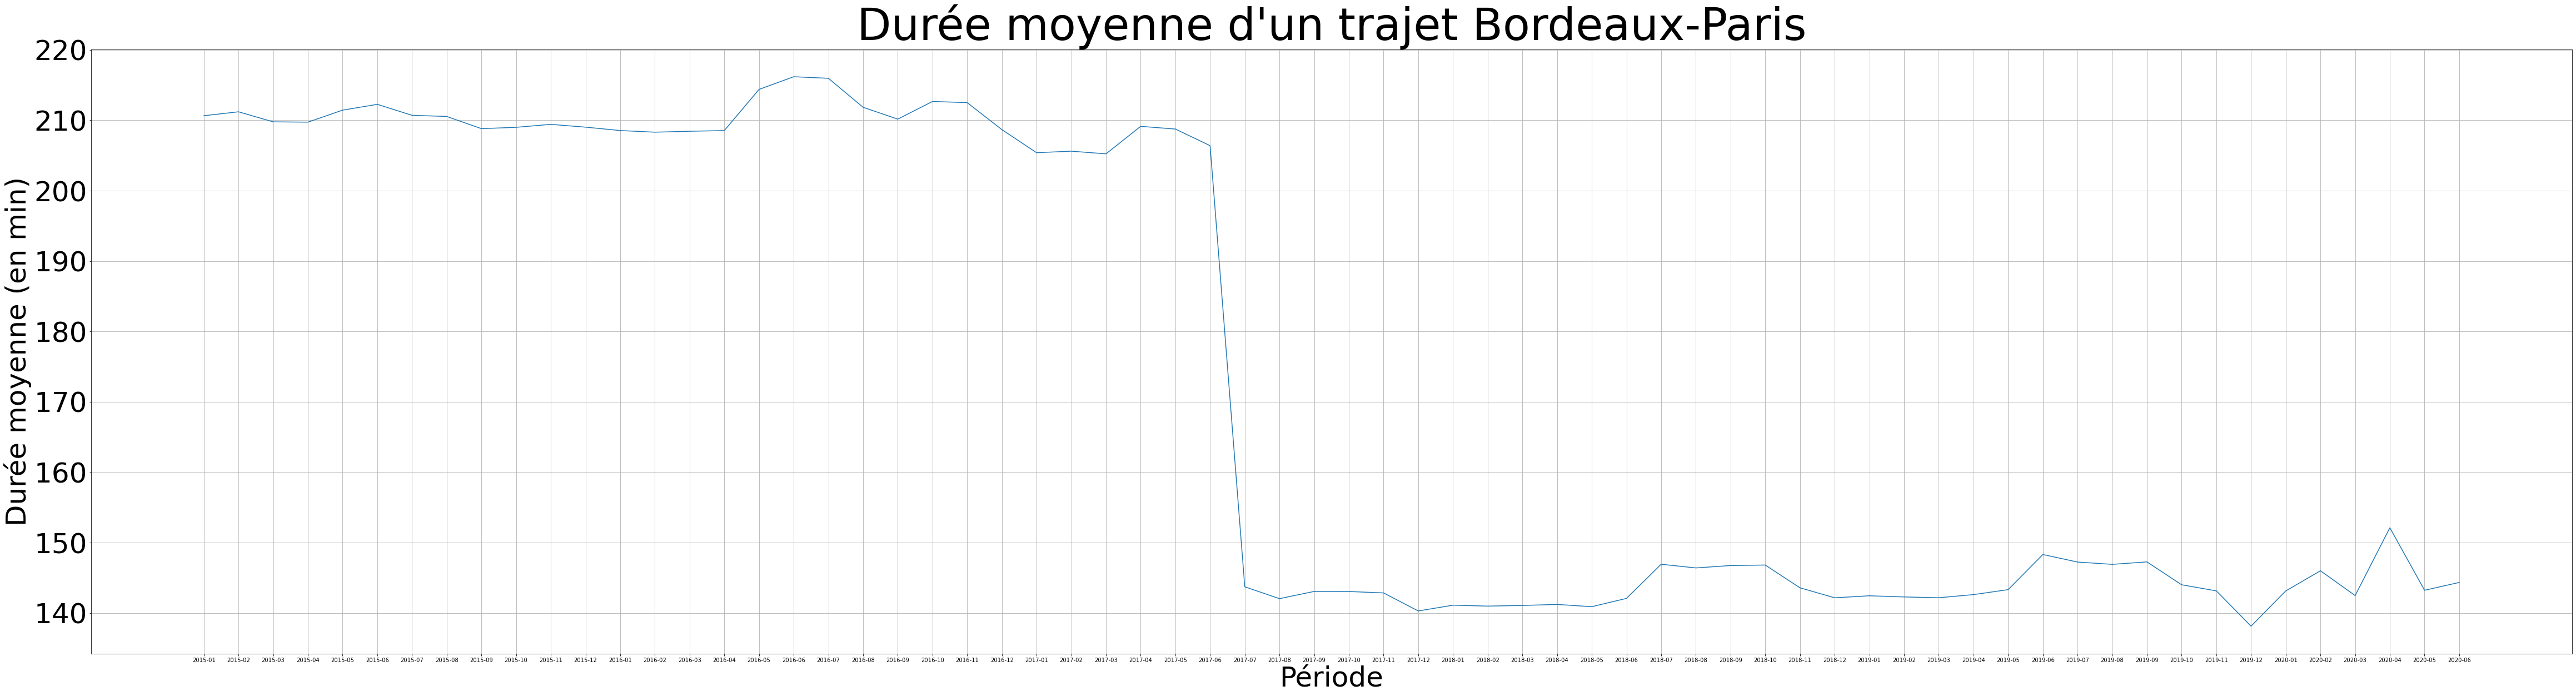

In [9]:
plt.clf()
plt.figure(figsize=(80,20))
plt.plot(bordeauxparis['Période'],bordeauxparis['Durée moyenne du trajet (min)'])
plt.title("Durée moyenne d'un trajet Bordeaux-Paris",size = 80)
plt.xlabel('Période', size = 50)
plt.ylabel('Durée moyenne (en min)', size = 50)
plt.yticks(size = 50)
plt.grid() 

In [10]:
frequentation_paris_bordeaux=pd.read_csv('https://raw.githubusercontent.com/mdlbm/SNCF-Immobilier/Mats/frequentation-paris-bordeaux.csv', sep=';')
frequentation_paris_bordeaux = frequentation_paris_bordeaux.sort_index(axis=1 ,ascending=True)
frequentation_paris_bordeaux

,Nom de la gare,Total Voyageurs 2015,Total Voyageurs 2016,Total Voyageurs 2017,Total Voyageurs 2018,Total Voyageurs 2019
0,Bordeaux Saint-Jean,12062338,12198403,14979299,16080989,17675655
1,Paris Montparnasse,55167519,55162747,57752741,59174531,61374035


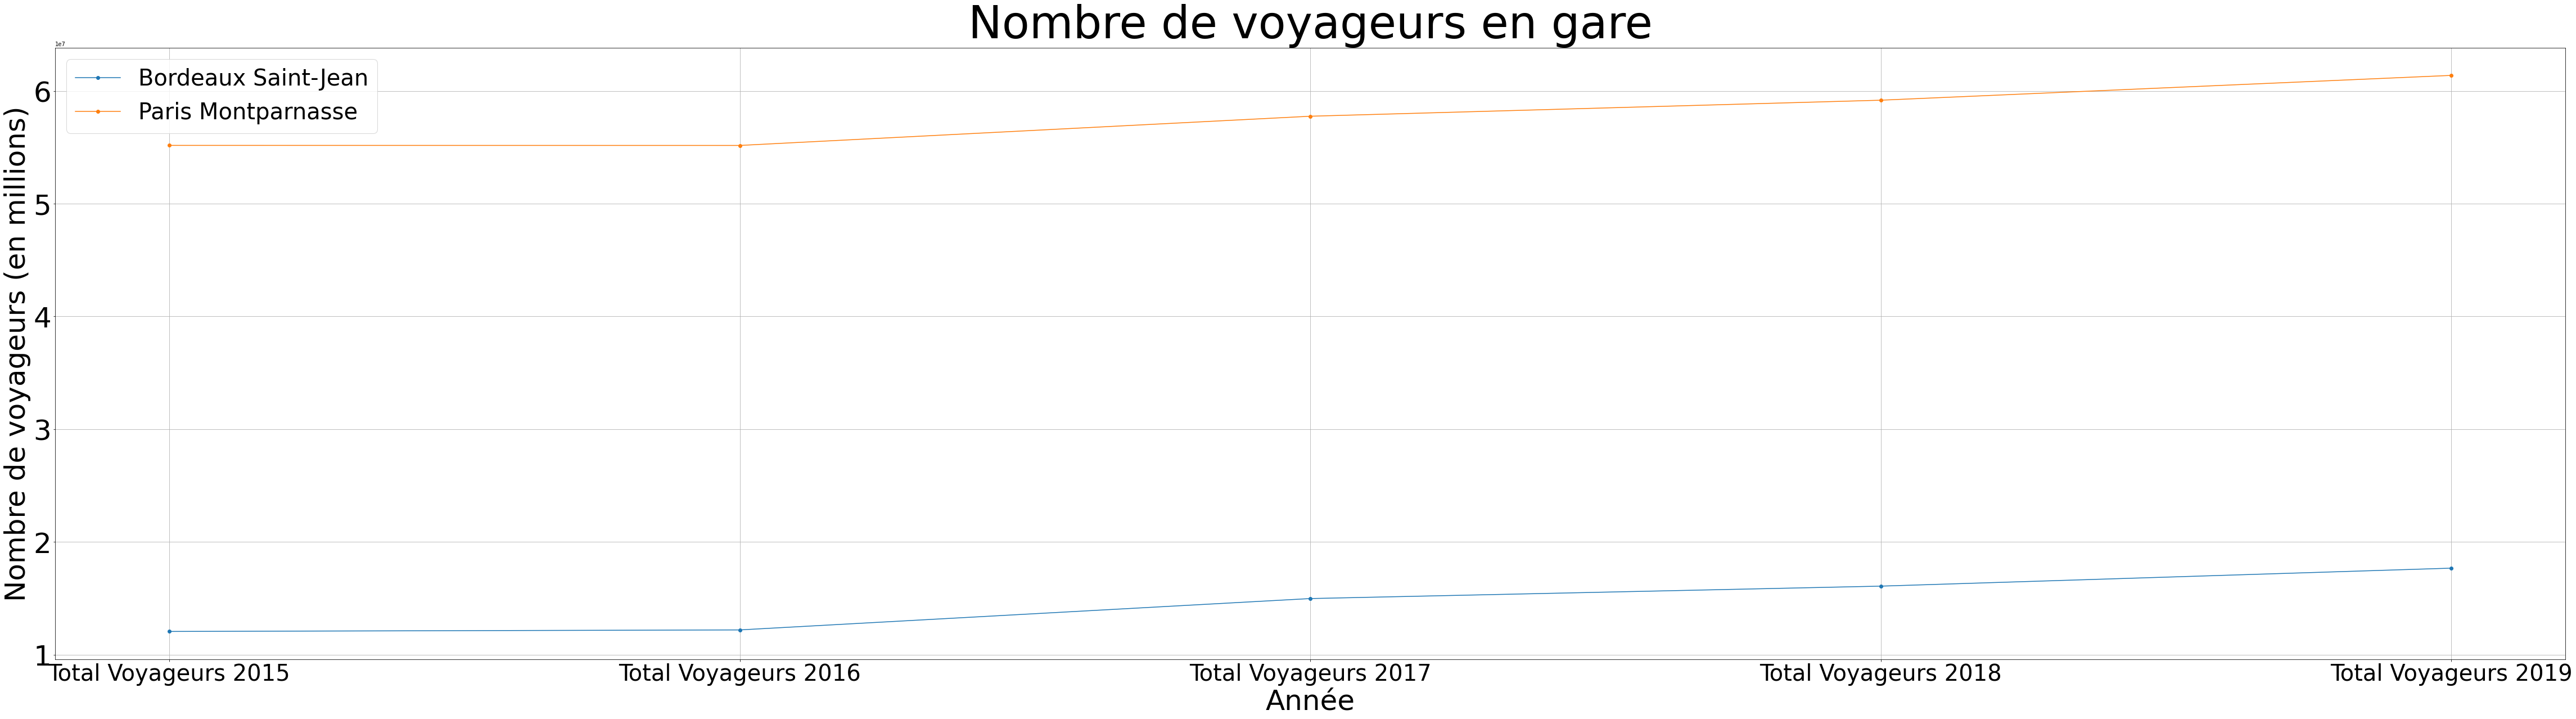

In [11]:
voyageursbordeaux=frequentation_paris_bordeaux.iloc[0,1:6]
voyageursparis=frequentation_paris_bordeaux.iloc[1,1:6]

plt.clf
plt.figure(figsize=(80,20))
plt.plot(voyageursbordeaux,marker='o', label="Bordeaux Saint-Jean")
plt.plot(voyageursparis,marker='o', label="Paris Montparnasse")
plt.title("Nombre de voyageurs en gare",size = 80)
plt.xlabel('Année', size = 50)
plt.ylabel('Nombre de voyageurs (en millions)', size = 50)
plt.xticks(size=40)
plt.yticks(size = 50)
plt.grid() 
plt.legend(loc='best', fontsize=40)

In [12]:
#Effet cumulatif depuis 2015
for i in range(5,10):
  frequentation_paris_bordeaux['Différence 201{}-2015'.format(i)]=frequentation_paris_bordeaux['Total Voyageurs 201{}'.format(i)]-frequentation_paris_bordeaux['Total Voyageurs 2015']
frequentation_paris_bordeaux

,Nom de la gare,Total Voyageurs 2015,Total Voyageurs 2016,Total Voyageurs 2017,Total Voyageurs 2018,Total Voyageurs 2019,Différence 2015-2015,Différence 2016-2015,Différence 2017-2015,Différence 2018-2015,Différence 2019-2015
0,Bordeaux Saint-Jean,12062338,12198403,14979299,16080989,17675655,0,136065,2916961,4018651,5613317
1,Paris Montparnasse,55167519,55162747,57752741,59174531,61374035,0,-4772,2585222,4007012,6206516


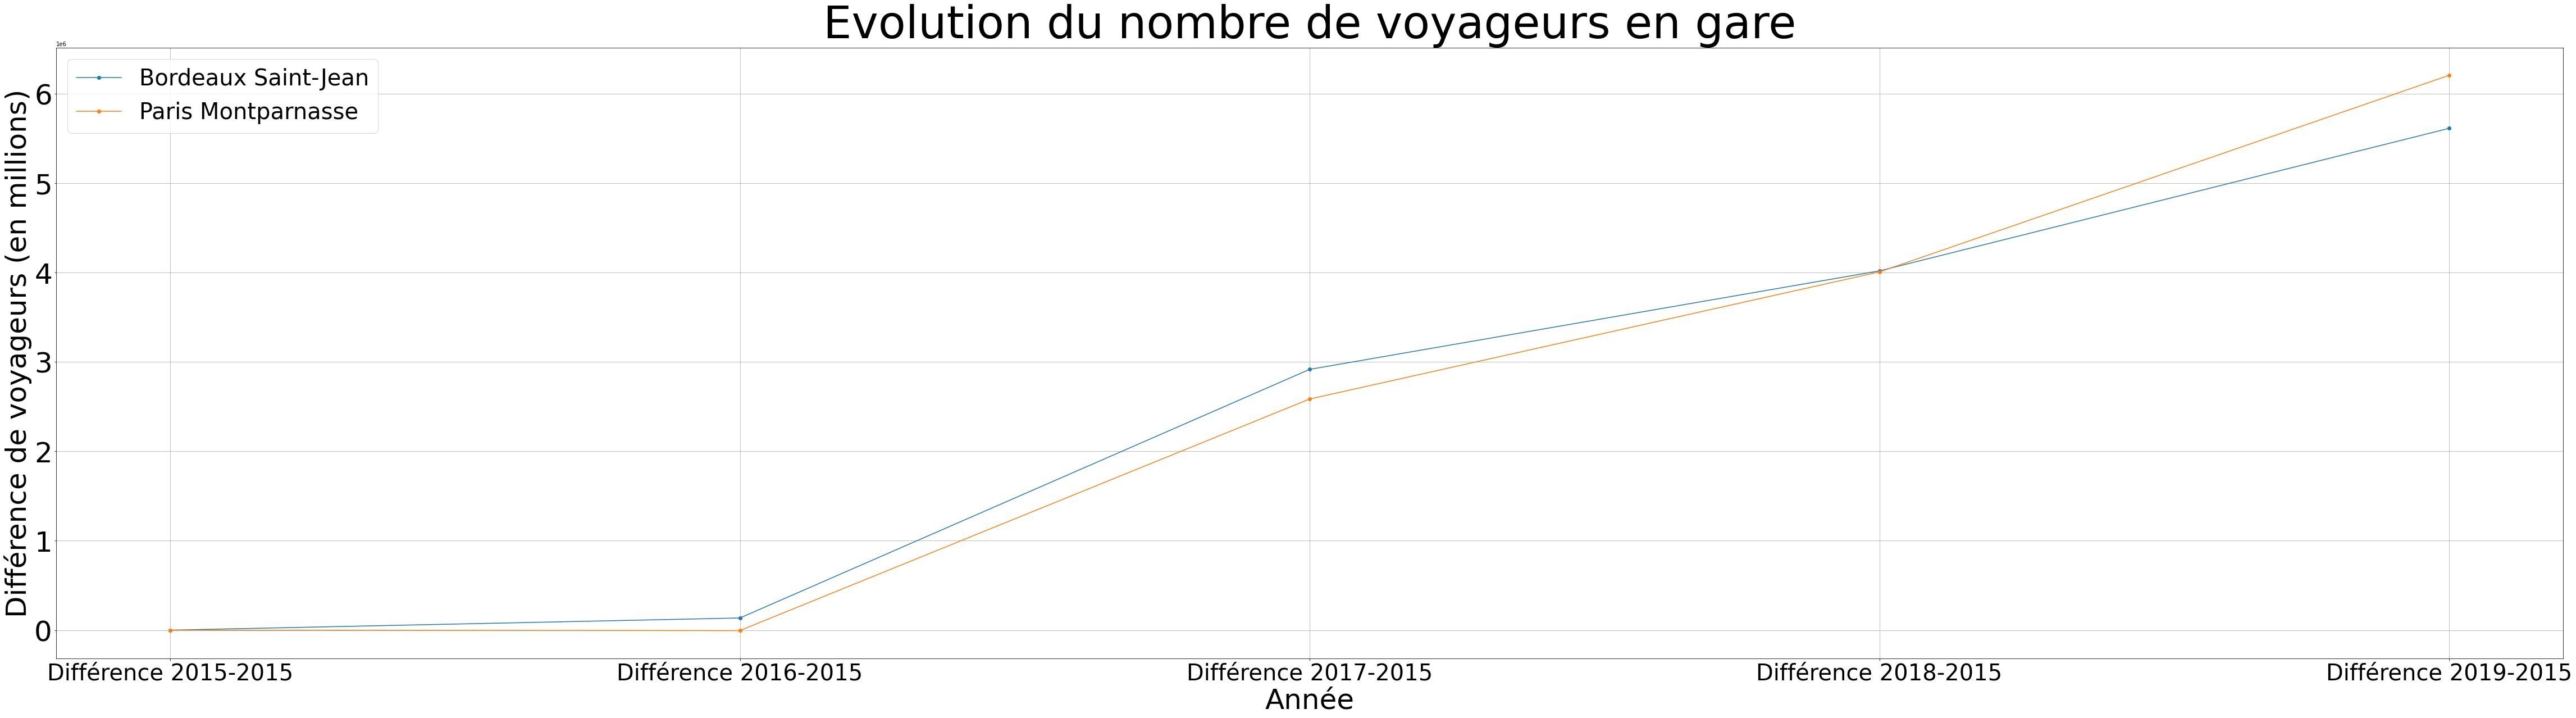

In [13]:
voyageursbordeaux_cum=frequentation_paris_bordeaux.iloc[0,6:]
voyageursparis_cum=frequentation_paris_bordeaux.iloc[1,6:]
plt.clf
plt.figure(figsize=(80,20))
plt.plot(voyageursbordeaux_cum,marker='o', label="Bordeaux Saint-Jean")
plt.plot(voyageursparis_cum,marker='o', label="Paris Montparnasse")
plt.title("Evolution du nombre de voyageurs en gare",size = 80)
plt.xlabel('Année', size = 50)
plt.ylabel('Différence de voyageurs (en millions)', size = 50)
plt.xticks(size=40)
plt.yticks(size = 50)
plt.grid()
plt.legend(loc='best', fontsize = 40)

Le but de ces graphiques est de montrer la corrélation effective entre le nombre de voyageurs et l'arrivée de la ligne LGV. En effet, ce dernier graphiques montre bien que, quelque soit la gare de départ (Paris Montparnasse ou Bordeaux), il y a une évolution significative  du nombre de voyageur dans les gares, et nous pouvons supposer que cette évolution est en grande partie dûe à une fréquentation la nouvelle ligne LGV.

# Hausse du prix de l'immobilier et les LGV de la SNCF

# I) Analyse du marché immobilier de la commune de Bordeaux entre 2014 et 2019:
<p>Cette section est dédiée à l'analyse des transactions immobilières qui se sont déroulées dans la commune de Bordeaux entre janvier 2014 à juin 2019. Son objectif est de dégager la structure de ces transactions et d'étudier son évolution sur la période considérée en vue potentiellement de déceler un possible effet de l'ouverture de la LGV Sud Europe Atlantique sur celle ci. Pour ce faire, deux jeux de données seront utilisées :
</p>
<ul>
    <li>Données <a href = 'https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres-geolocalisees/'>Demandes de valeurs foncières géolocalisées (DVF)</a> qui recense l'ensemble des mutations immobilères s'étant effectuées sur la période considérée;
    </li>
    <li>Données <a href = 'https://www.data.gouv.fr/fr/datasets/quartiers-des-communes-sur-le-territoire-de-bordeaux-metropole/'>Quartiers des communes sur le territoire de Bordeaux Métropole</a> de type géospatiale qui serviront à la cartographie de la commune de bordeaux.
    </li>
</ul>

## 1) Etude du nombre total de transactions :

In [14]:
# Importation des données sur les valeurs immobilières de la Gironde

import requests
import pandas as pd
data_json = pd.DataFrame(requests.get("http://api.cquest.org/dvf?code_commune=33063").json()["resultats"])[["code_commune","code_postal", 
                                      "code_type_local", "type_local", "surface_relle_bati","surface_terrain", "nombre_pieces_principales", 
                                      "section","lon", "lat", 'date_mutation','numero_voie','voie','type_voie',"valeur_fonciere"]]
data_json = data_json[data_json["surface_relle_bati"].notna()][data_json["valeur_fonciere"].notna()]
g = data_json.groupby(['date_mutation','valeur_fonciere']).date_mutation.count().to_frame('occurence').reset_index() # Création de la colonne occurence. Les occurences permettent d'étudier les ventes d'appartemets par blocs et nous sera utiles pour callculer la variable surface_terrain_effective
h = data_json.groupby(['date_mutation','valeur_fonciere']).surface_relle_bati.sum().to_frame('surface_immeuble').reset_index() # Création de la colonne surface immeuble. La valeur foncière d'un appartment est associée à celle de tout l'immeuble. Cette variable nous permettra donc de calculer plus justemment le prix du m2
data_json['surface_terrain'] = data_json['surface_terrain'].fillna(0) #On remplit 
data_json = data_json.merge(g)#Ajout au data frame de la colonne occurence
data_json = data_json.merge(h)#Ajout au data frame de la colonne surface immeuble

data_json['surface_terrain_effective']=data_json['surface_terrain']/data_json['occurence'] #Création de la colonne surface_terrain_effective. Elle rend compte de la surface en plus d'un logement, comme une enceinte d'un immeuble ou un jardin communautaire, en le divisant par le nombre d'appartements en jouissant


# Création de la variable valeur au m2
data_json["valeur_m2"] = data_json["valeur_fonciere"] / (data_json["surface_immeuble"]+data_json["surface_terrain_effective"])
data_json_2 = data_json.copy()

data_json = data_json[data_json['valeur_m2']>1000] #On enlève des valeurs trop hautes
data_json = data_json[data_json['valeur_m2']<7000] #on enlève les valeurs trop basses. Enlever ces valeurs rend plus crédibles les données dvf. On voit mal un prix du m2 à plus de 15 000€ ou à moins de 500 €. Les valeurs ont été choisi arbitrairement de sorte à garder une certaine crédibiité tout en gardant le plus de données possibles.


# Affichage dimensions dataframe
print("(Nb_lignes, Nb_colonnes) = ",data_json.shape,'\n')

<ipython-input-14-6f5c6b54ed13>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_json = data_json[data_json["surface_relle_bati"].notna()][data_json["valeur_fonciere"].notna()]


(Nb_lignes, Nb_colonnes) =  (54590, 19) 



In [15]:
# Dimensions et Données manquantes 
print("(Nb_lignes, Nb_colonnes) = ",data_json.shape,'\n')
print("Nombre de valeurs manquantes par variables :\n",data_json.isna().sum())

(Nb_lignes, Nb_colonnes) =  (54590, 19) 

Nombre de valeurs manquantes par variables :
 code_commune                    0
code_postal                     0
code_type_local                 0
type_local                      0
surface_relle_bati              0
surface_terrain                 0
nombre_pieces_principales       0
section                         0
lon                           570
lat                           570
date_mutation                   0
numero_voie                  1815
voie                            0
type_voie                       2
valeur_fonciere                 0
occurence                       0
surface_immeuble                0
surface_terrain_effective       0
valeur_m2                       0
dtype: int64


In [16]:
# Affichage des 7 premières observations
data_json.head(7)

,code_commune,code_postal,code_type_local,type_local,surface_relle_bati,surface_terrain,nombre_pieces_principales,section,lon,lat,date_mutation,numero_voie,voie,type_voie,valeur_fonciere,occurence,surface_immeuble,surface_terrain_effective,valeur_m2
2,33063,33100,2,Appartement,40.0,0.0,2.0,AB,-0.537767,44.867193,2014-02-28,200,DE BRAZZA,QUAI,118500.0,1,40.0,0.0,2962.500000
3,33063,33100,2,Appartement,43.0,0.0,3.0,AB,-0.537767,44.867193,2015-12-17,200,DE BRAZZA,QUAI,117500.0,2,43.0,0.0,2732.558140
4,33063,33100,3,Dépendance,0.0,0.0,0.0,AB,-0.537767,44.867193,2015-12-17,200,DE BRAZZA,QUAI,117500.0,2,43.0,0.0,2732.558140
5,33063,33100,4,Local industriel. commercial ou assimilé,100.0,0.0,0.0,AB,-0.537704,44.867400,2017-06-27,202,DE BRAZZA,QUAI,141000.0,1,100.0,0.0,1410.000000
8,33063,33100,1,Maison,62.0,194.0,2.0,AB,-0.537665,44.867802,2018-04-05,205,DE BRAZZA,QUAI,265000.0,1,62.0,194.0,1035.156250
14,33063,33100,2,Appartement,39.0,0.0,2.0,AE,-0.542496,44.853073,2016-11-16,8,ANDRE LAMANDE,RUE,160000.0,1,39.0,0.0,4102.564103
29,33063,33100,2,Appartement,20.0,208.0,1.0,AE,-0.542303,44.852912,2016-11-30,54,DES VIVANTS,RUE,750000.0,10,253.0,20.8,2739.225712


In [17]:
# Vérification du type de date_mutation
data_json["date_mutation"].dtypes

dtype('O')

In [18]:
# Formattage en type date
data_json["date_mutation"] = data_json["date_mutation"].astype('datetime64')
data_json["date_mutation"].dtypes

dtype('<M8[ns]')

In [19]:
# Création de la variable year (Année mutation)
data_json["year"] = pd.DatetimeIndex(data_json["date_mutation"]).year
# Nombre de mutations effectués par années
data_json["year"].value_counts().sort_index()

2014     9404
2015     9486
2016    10410
2017    11785
2018     9501
2019     4004
Name: year, dtype: int64

On remarque que le nombre total de mutations enregistré par année n'a cessé d'augmenter entre 2014 et 2017, passant de 12368 à 17614. Au cours de cette période, l'augmentation était assez uniforme (de l'ordre d'environ 100 nouvelles mutations par année) mis à part le passage entre 2016 et 2017 où l'augmentation enregistrée représentait presque le double de celle observée habituellement. Notons que cette année 2017 correspond à l'année de mise en service de la LGV Sud Europe Atlantique reliant Paris à Bordeaux. A la suite de celle-ci, le nombre total de mutations enregistrées à diminué se retrouvant à 14419 en 2018 soit une baisse d'un peu plus de 200 (mutations). Il est cependant à noter que bien que le niveau ait baissé, il reste encore de loin supérieur à celui enregistré en 2012. La valeur observée en 2019 laisse entrevoir que le nombre de mutations a poursuivi sa baisse étant donnée que la valeur obtenue pour le premier semestre de 2019 est de loin inférieur à la moitié de celle de l'année précédente.
### a) Typologie des mutations

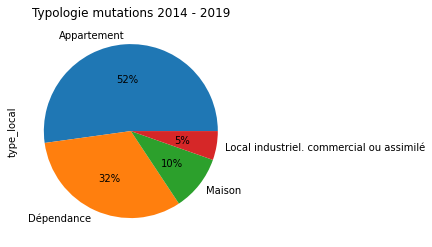

In [20]:
# Diagrammes circulaire sur l'ensemble de la période
data_json["type_local"].value_counts(normalize=True).plot(kind='pie',autopct='%1.0f%%',title = "Typologie mutations 2014 - 2019") 

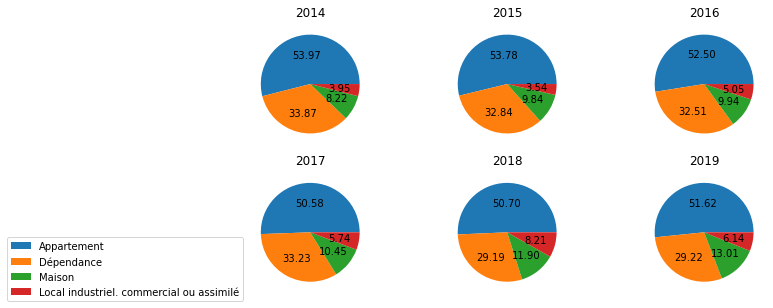

In [21]:
# Diagrammes circulaire sur par année
fig, axes = plt.subplots(2,3, figsize = (10,5))
axes = axes.flatten()
years = list(data_json["year"].sort_values().unique())
for ax, year in zip(axes, years):
    ax.pie(data_json[data_json["year"] == year]["type_local"].value_counts(normalize=True),
           labels=None,
           autopct='%.2f')
    ax.set(ylabel='', title=year, aspect='equal')
axes[3].legend(bbox_to_anchor=(0, 0.5),labels = data_json[data_json["year"] == year]["type_local"].value_counts(normalize=True).index)

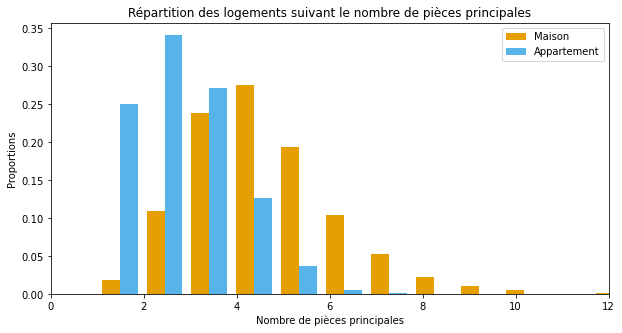

In [22]:
x1 = list(data_json[(data_json["type_local"] == "Maison") & (data_json["nombre_pieces_principales"]>0)]['nombre_pieces_principales'])
x2 = list(data_json[(data_json["type_local"] == "Appartement") & (data_json["nombre_pieces_principales"]>0)]['nombre_pieces_principales'])

colors = ["#E69F00","#56B4E9"]
names = ["Maison","Appartement"]

figure = plt.figure(figsize = (10,5))
axes = figure.add_subplot(111)
plt.hist([x1,x2],bins = 30, density = True, color = colors, label = names)

plt.legend()
axes.set_xlim(0, 12)
plt.xlabel("Nombre de pièces principales")
plt.ylabel("Proportions")
plt.title('Répartition des logements suivant le nombre de pièces principales')
plt.show()

### b) Localisation des logements :

In [23]:
# Importation de la base de travail
import geopandas as gpd
!pip install descartes
import descartes
bordeaux_sections = gpd.read_file('https://raw.githubusercontent.com/mdlbm/SNCF-Immobilier/Mats/cadastre-33063-sections.json')
# Affichage des 3 premières observations
bordeaux_sections.shape#head(3)

(390, 7)

In [24]:
# Transformation data_json en fichier geopandas
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
crs = {'init':'epsg:4326'}
geometry = [Point(i) for i in zip(data_json['lon'],data_json['lat'])]
geo_data_json = gpd.GeoDataFrame(data_json,crs = crs,geometry = geometry)
geo_data_json_2 = geo_data_json.copy()
geo_data_json.head(3)

C:\Users\Mats\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,code_commune,code_postal,code_type_local,type_local,surface_relle_bati,surface_terrain,nombre_pieces_principales,section,lon,lat,...,numero_voie,voie,type_voie,valeur_fonciere,occurence,surface_immeuble,surface_terrain_effective,valeur_m2,year,geometry
2,33063,33100,2,Appartement,40.0,0.0,2.0,AB,-0.537767,44.867193,...,200,DE BRAZZA,QUAI,118500.0,1,40.0,0.0,2962.50000,2014,POINT (-0.53777 44.86719)
3,33063,33100,2,Appartement,43.0,0.0,3.0,AB,-0.537767,44.867193,...,200,DE BRAZZA,QUAI,117500.0,2,43.0,0.0,2732.55814,2015,POINT (-0.53777 44.86719)
4,33063,33100,3,Dépendance,0.0,0.0,0.0,AB,-0.537767,44.867193,...,200,DE BRAZZA,QUAI,117500.0,2,43.0,0.0,2732.55814,2015,POINT (-0.53777 44.86719)


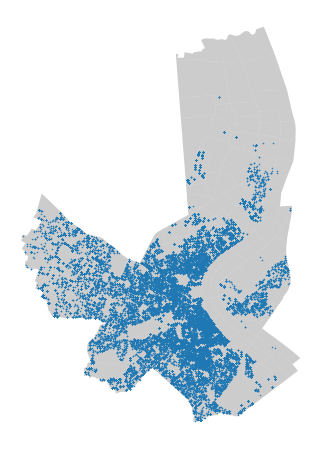

In [25]:
# Localisation des logements dans la commune de bordeaux sur l'ensemble de la période
fig,ax = plt.subplots(figsize = (8,8))
bordeaux_sections.plot(ax=ax, alpha=0.4, color = 'grey')
geo_data_json.plot(ax=ax,markersize=0.3)
ax.axis('off')
plt.show()

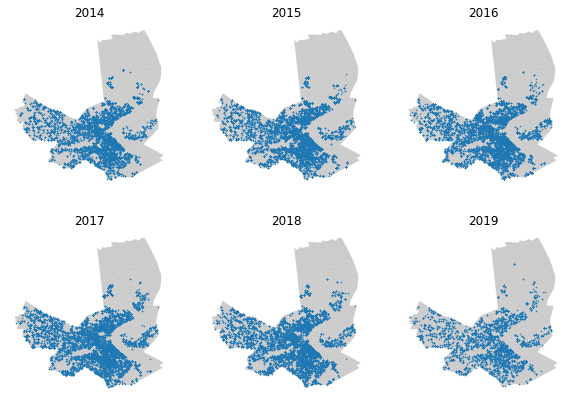

In [26]:
# Diagrammes circulaire sur par année
fig, axes = plt.subplots(2,3, figsize = (10,7))
axes = axes.flatten()
years = list(geo_data_json["year"].sort_values().unique())
for ax, year in zip(axes, years):
    bordeaux_sections.plot(ax=ax, alpha=0.4, color = 'grey')
    geo_data_json[geo_data_json["year"] == year].plot(ax=ax,markersize=0.3)
    ax.set(ylabel='', title=year, aspect='equal')
    ax.axis('off')

In [27]:
# Création Variable cadastre dans geo_data_json par jointure
geo_data_json = geo_data_json[geo_data_json.is_valid]
geo_data_json_2 = geo_data_json.copy()
geo_data_json = gpd.sjoin(geo_data_json, bordeaux_sections,how="inner", op='intersects')
geo_data_json.head(3)

<ipython-input-27-44691b6667c7>:4: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  geo_data_json = gpd.sjoin(geo_data_json, bordeaux_sections,how="inner", op='intersects')


,code_commune,code_postal,code_type_local,type_local,surface_relle_bati,surface_terrain,nombre_pieces_principales,section,lon,lat,...,valeur_m2,year,geometry,index_right,id,commune,prefixe,code,created,updated
2,33063,33100,2,Appartement,40.0,0.0,2.0,AB,-0.537767,44.867193,...,2962.50000,2014,POINT (-0.53777 44.86719),0,33063000AB,33063,000,AB,2002-06-07,2014-02-11
3,33063,33100,2,Appartement,43.0,0.0,3.0,AB,-0.537767,44.867193,...,2732.55814,2015,POINT (-0.53777 44.86719),0,33063000AB,33063,000,AB,2002-06-07,2014-02-11
4,33063,33100,3,Dépendance,0.0,0.0,0.0,AB,-0.537767,44.867193,...,2732.55814,2015,POINT (-0.53777 44.86719),0,33063000AB,33063,000,AB,2002-06-07,2014-02-11


In [28]:
# Création de la variable tolal de mutations dans bordeaux_sections
merge = geo_data_json.groupby("code")['code'].count().to_frame('nb_tot').reset_index()
bordeaux_sections = bordeaux_sections.merge(merge, how = "left", on = "code" )
bordeaux_sections.head(3)
#merge

,id,commune,prefixe,code,created,updated,geometry,nb_tot
0,33063000AB,33063,000,AB,2002-06-07,2014-02-11,"MULTIPOLYGON (((-0.53689 44.86842, -0.53689 44...",5.0
1,33063000AC,33063,000,AC,2002-06-07,2014-02-11,"MULTIPOLYGON (((-0.53766 44.86369, -0.53801 44...",NaN
2,33063000AD,33063,000,AD,2002-06-07,2014-02-11,"MULTIPOLYGON (((-0.54329 44.85308, -0.54326 44...",NaN


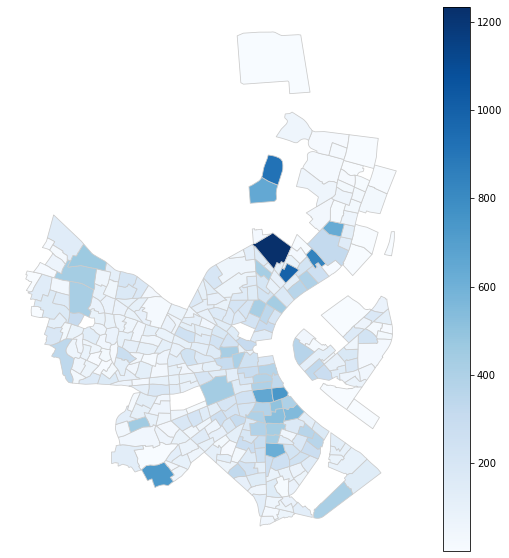

In [29]:
# Choropleth nb mutations
def cloropleth(data,variable,size ="",title = '',ax =""):
    vmax = data[variable].max()
    vmin = data[variable].min()

    if ax == "":
        fig1,ax = plt.subplots(1)
        
    else:
        fig1 = plt.figure()
    bordeaux_sections.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
    ax.axis('off')
    if size != "":
        fig1.set_figheight(size[0])
        fig1.set_figwidth(size[1])
    ax.set_title(title, fontdict={'fontsize': '15', 'fontweight' : '3'})
    
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig1.colorbar(sm,ax=ax)

cloropleth(bordeaux_sections,"nb_tot",size = (10,10))

In [30]:
bordeaux_sections.sort_values("nb_tot",ascending=False)[["code","nb_tot"]].head(5)

,code,nb_tot
301,RM,1233.0
303,RO,994.0
337,TH,919.0
310,RX,840.0
135,HE,743.0


In [31]:
# Création de la variable tolal de mutations dans bordeaux_sections pour chaque années
for year in years :
    merge = geo_data_json[geo_data_json["year"]==year].groupby("code")['code'].count().to_frame('nb_tot_'+str(year)).reset_index()
    bordeaux_sections = bordeaux_sections.merge(merge, how = "left", on = "code" )
bordeaux_sections.head(3)

,id,commune,prefixe,code,created,updated,geometry,nb_tot,nb_tot_2014,nb_tot_2015,nb_tot_2016,nb_tot_2017,nb_tot_2018,nb_tot_2019
0,33063000AB,33063,000,AB,2002-06-07,2014-02-11,"MULTIPOLYGON (((-0.53689 44.86842, -0.53689 44...",5.0,1.0,2.0,NaN,1.0,1.0,NaN
1,33063000AC,33063,000,AC,2002-06-07,2014-02-11,"MULTIPOLYGON (((-0.53766 44.86369, -0.53801 44...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,33063000AD,33063,000,AD,2002-06-07,2014-02-11,"MULTIPOLYGON (((-0.54329 44.85308, -0.54326 44...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


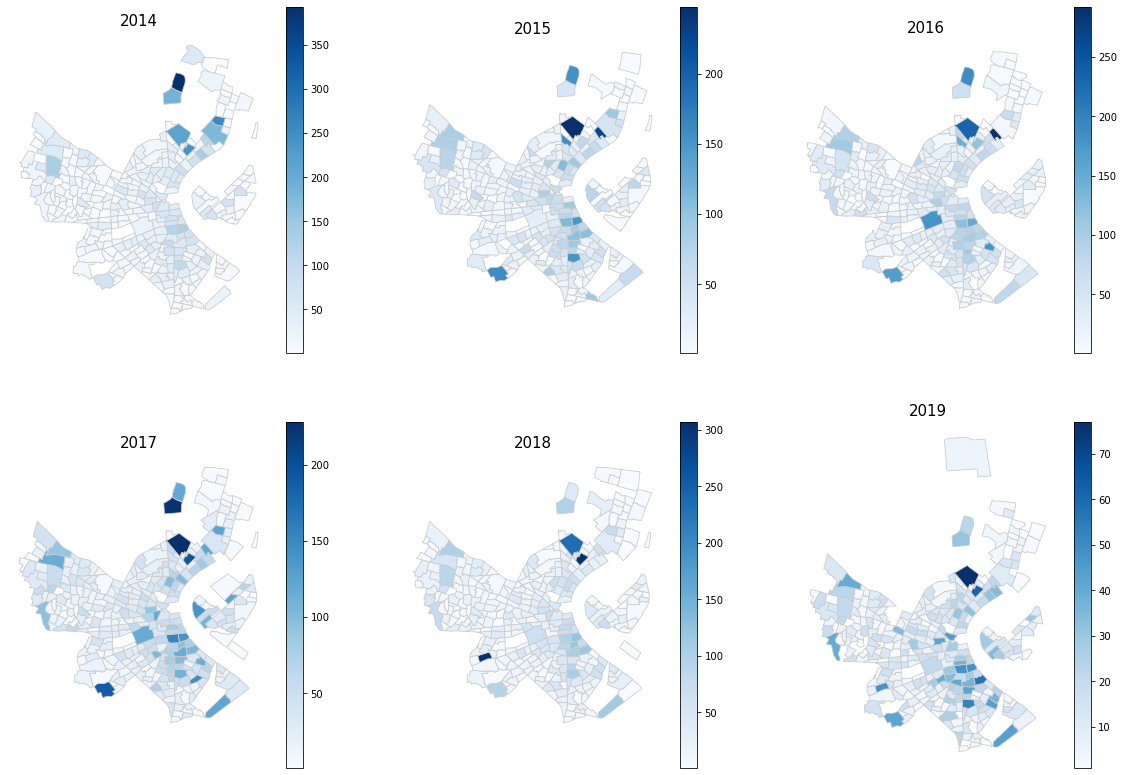

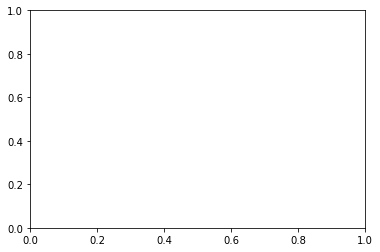

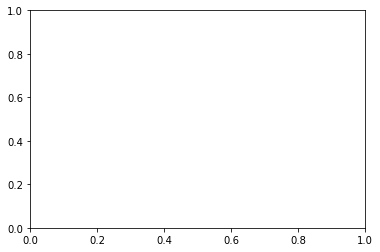

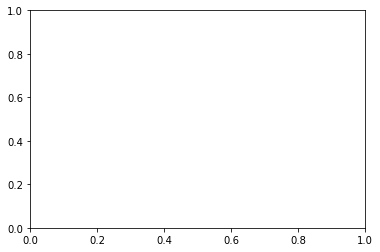

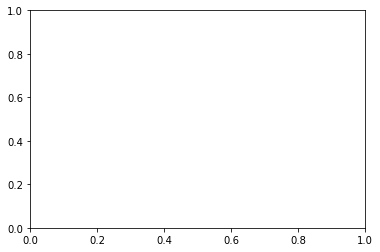

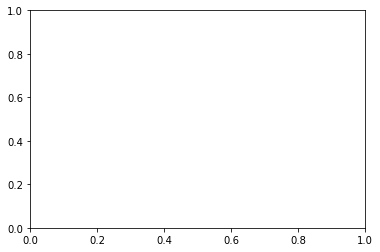

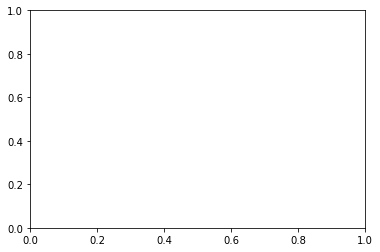

In [32]:
# Choropleth nb mutations par années
fig, axes = plt.subplots(2,3, figsize = (20,14))
axes = axes.flatten()
for ax, year in zip(axes, years) :
    cloropleth(bordeaux_sections,"nb_tot_"+str(year),ax=ax,title=year)

In [33]:
# Sections cadastres enregistrant le plus de mutations par année
for year in years :
    print("Année ",year," :\n",
          bordeaux_sections.sort_values("nb_tot_"+str(year),ascending=False)[["code","nb_tot_"+str(year)]].head(3),
          '\n\n')

Année  2014  :
     code  nb_tot_2014
337   TH        393.0
316   SD        256.0
303   RO        244.0 


Année  2015  :
     code  nb_tot_2015
301   RM        248.0
310   RX        227.0
154   ID        160.0 


Année  2016  :
     code  nb_tot_2016
310   RX        292.0
301   RM        232.0
337   TH        188.0 


Année  2017  :
     code  nb_tot_2017
301   RM        228.0
334   TC        225.0
303   RO        194.0 


Année  2018  :
     code  nb_tot_2018
161   IO        307.0
303   RO        305.0
301   RM        233.0 


Année  2019  :
     code  nb_tot_2019
301   RM         77.0
303   RO         62.0
72    DN         57.0 




##2) Etude du prix du m²

In [34]:
# Données avec surface renseignée (appartements et maisons)
data_json = data_json[(data_json['type_local']=='Appartement')|(data_json['type_local']=='Maison')]

In [35]:
# Aperçu des données
data_json.sort_values("valeur_m2", ascending = False).head(20)

,code_commune,code_postal,code_type_local,type_local,surface_relle_bati,surface_terrain,nombre_pieces_principales,section,lon,lat,...,numero_voie,voie,type_voie,valeur_fonciere,occurence,surface_immeuble,surface_terrain_effective,valeur_m2,year,geometry
29235,33063,33000,2,Appartement,39.0,0.0,2.0,KJ,-0.571495,44.840243,...,28,PARLEMENT ST PIERRE,RUE,272800.0,1,39.0,0.0,6994.871795,2017,POINT (-0.57149 44.84024)
29234,33063,33000,2,Appartement,39.0,0.0,2.0,KJ,-0.571495,44.840243,...,28,PARLEMENT ST PIERRE,RUE,272800.0,1,39.0,0.0,6994.871795,2017,POINT (-0.57149 44.84024)
29639,33063,33000,2,Appartement,14.0,0.0,1.0,KL,-0.570542,44.838707,...,26,DES BAHUTIERS,RUE,97860.0,2,14.0,0.0,6990.000000,2017,POINT (-0.57054 44.83871)
32697,33063,33000,2,Appartement,120.0,0.0,5.0,KW,-0.580985,44.843444,...,27,DE LURBE,RUE,838000.0,2,120.0,0.0,6983.333333,2018,POINT (-0.58098 44.84344)
28108,33063,33000,2,Appartement,12.0,0.0,1.0,KD,-0.582324,44.841043,...,46,SAINT SERNIN,RUE,83790.0,1,12.0,0.0,6982.500000,2016,POINT (-0.58232 44.84104)
43853,33063,33000,2,Appartement,61.0,0.0,3.0,PD,-0.580324,44.847292,...,3,DES TANNERIES,IMP,425600.0,1,61.0,0.0,6977.049180,2018,POINT (-0.58032 44.84729)
30567,33063,33000,2,Appartement,129.0,0.0,4.0,KN,-0.577504,44.841455,...,7,DE GRASSI,RUE,1500000.0,2,215.0,0.0,6976.744186,2018,POINT (-0.57750 44.84146)
30566,33063,33000,2,Appartement,86.0,0.0,3.0,KN,-0.577504,44.841455,...,7,DE GRASSI,RUE,1500000.0,2,215.0,0.0,6976.744186,2018,POINT (-0.57750 44.84146)
3757,33063,33100,2,Appartement,21.0,0.0,1.0,BM,-0.548080,44.839609,...,108,JOSEPH FAURE,RUE,146511.0,2,21.0,0.0,6976.714286,2016,POINT (-0.54808 44.83961)
22785,33063,33000,2,Appartement,40.0,0.0,2.0,HK,-0.583216,44.832315,...,140,BELLEVILLE,RUE,279000.0,1,40.0,0.0,6975.000000,2019,POINT (-0.58322 44.83232)


In [36]:
bordeaux_sections = gpd.read_file('https://raw.githubusercontent.com/mdlbm/SNCF-Immobilier/Mats/cadastre-33063-sections.json') #Importation des sections cadastrale de Bordeaux
bordeaux_sections=bordeaux_sections.rename(columns={'code':'section'}) # Renommage de la colonne code en section pour permettre la fusion par section cadastrale
valeurs_m2_agg = data_json.groupby('section').mean().reset_index() #Création d'une data frame regroupant la moyenne de la valeur au m2 par section cadastrale

bordeaux_sections.merge(valeurs_m2_agg) #Fusion des sections cadastrales

,id,commune,prefixe,section,created,updated,geometry,surface_relle_bati,surface_terrain,nombre_pieces_principales,lon,lat,valeur_fonciere,occurence,surface_immeuble,surface_terrain_effective,valeur_m2,year
0,33063000AB,33063,000,AB,2002-06-07,2014-02-11,"MULTIPOLYGON (((-0.53689 44.86842, -0.53689 44...",48.333333,64.666667,2.333333,-0.537733,44.867396,167000.000000,1.333333,48.333333,64.666667,2243.404797,2015.666667
1,33063000AE,33063,000,AE,2002-06-07,2014-02-11,"MULTIPOLYGON (((-0.53939 44.85542, -0.53946 44...",70.862069,87.982759,2.775862,-0.540659,44.853252,350293.413793,3.172414,123.275862,47.331897,2648.610105,2016.844828
2,33063000AF,33063,000,AF,2002-06-07,2014-02-11,"MULTIPOLYGON (((-0.54368 44.85330, -0.54371 44...",61.000000,0.000000,3.000000,-0.548958,44.854715,249500.000000,2.000000,61.000000,0.000000,4090.163934,2017.000000
3,33063000AH,33063,000,AH,2002-06-07,2014-02-11,"MULTIPOLYGON (((-0.54514 44.85158, -0.54500 44...",67.580645,30.096774,2.849462,-0.542909,44.852213,214523.365591,2.182796,74.204301,27.129032,2435.537012,2016.956989
4,33063000AI,33063,000,AI,2002-06-07,2014-02-11,"MULTIPOLYGON (((-0.53759 44.85034, -0.53762 44...",66.934211,89.105263,2.842105,-0.539707,44.851350,292487.631579,2.315789,109.328947,49.589912,2609.954853,2016.355263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,33063000YS,33063,000,YS,2002-06-13,2014-02-11,"MULTIPOLYGON (((-0.63226 44.85109, -0.63230 44...",57.471698,42.415094,2.490566,-0.631125,44.850594,239537.754717,2.358491,60.547170,34.292453,3597.867390,2016.773585
334,33063000YT,33063,000,YT,2002-06-13,2014-02-11,"MULTIPOLYGON (((-0.63266 44.84629, -0.63251 44...",63.362319,4.695652,2.913043,-0.630601,44.847022,186954.782609,2.811594,65.768116,4.695652,2885.620268,2016.536232
335,33063000YV,33063,000,YV,2002-06-13,2014-02-11,"MULTIPOLYGON (((-0.62806 44.84734, -0.62779 44...",80.352941,68.411765,3.411765,-0.627117,44.849468,223993.882353,2.176471,88.176471,42.811765,2089.211476,2016.764706
336,33063000YW,33063,000,YW,2002-06-13,2014-02-11,"MULTIPOLYGON (((-0.63175 44.86356, -0.63181 44...",85.150000,135.450000,3.350000,-0.630200,44.861655,310143.100000,1.975000,109.150000,93.377083,2152.924136,2016.100000


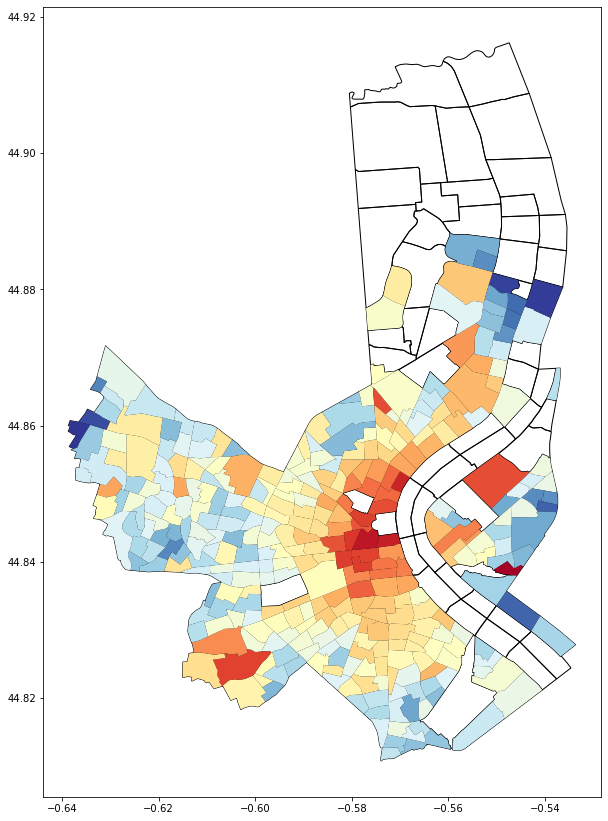

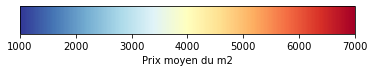

In [37]:
#Affichage d'une heatmap fonction du prix moyen du m2 à Bordeaux sur la période 2015-2019
base = bordeaux_sections.plot(edgecolor = 'black', figsize = (10,20), facecolor = 'none')
bordeaux_sections.merge(valeurs_m2_agg).plot(column='valeur_m2',cmap = 'RdYlBu_r', ax=base)
#Création de la légende
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
cmap = mpl.cm.RdYlBu_r
norm = mpl.colors.Normalize(vmin=1000, vmax=7000)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label="Prix moyen du m2")


In [38]:
valeurs_m2_année = data_json.groupby(['year','section']).valeur_m2.mean().to_frame('moyenne_m2').reset_index() #On regroupe le prix moyen du m2 par année et par section cadastrale

In [39]:
valeurs_m2_année=valeurs_m2_année.pivot(index='section', columns='year', values='moyenne_m2') # Le data frame est modifié pour laisser voir un tableau à double entrée qui donne pour une section cadastrale et et une année données le prix moyen du m2 s'il y a eu de transaction. 
valeurs_m2_année

year,2014,2015,2016,2017,2018,2019
section,,,,,,
AB,2962.500000,2732.558140,NaN,NaN,1035.156250,NaN
AE,2544.394299,2928.699489,2542.133928,2814.564622,2330.589893,3215.899326
AF,NaN,NaN,NaN,4090.163934,NaN,NaN
AH,1595.134469,2343.440008,2266.530865,2514.109321,2430.371726,2975.612971
AI,1522.081871,3681.934726,1989.040480,3468.919417,1837.040725,1664.045319
...,...,...,...,...,...,...
YS,2121.785867,2662.279212,3146.176835,4032.121352,3873.752881,2855.555556
YT,2563.439367,2376.484085,2770.004425,2887.994211,3353.920971,3020.331448
YV,2323.943662,NaN,2124.402708,2157.066844,1867.792493,NaN


In [40]:
a=valeurs_m2_année.transpose().pct_change().transpose() # Calcul du taux d'évolution du prix moyen du m2 par année et par section cadastrale
a

year,2014,2015,2016,2017,2018,2019
section,,,,,,
AB,NaN,-0.077618,0.000000,0.000000,-0.621177,0.000000
AE,NaN,0.151040,-0.131992,0.107166,-0.171954,0.379865
AF,NaN,NaN,NaN,NaN,0.000000,0.000000
AH,NaN,0.469118,-0.032819,0.109232,-0.033307,0.224345
AI,NaN,1.419012,-0.459784,0.744017,-0.470429,-0.094171
...,...,...,...,...,...,...
YS,NaN,0.254735,0.181761,0.281594,-0.039277,-0.262845
YT,NaN,-0.072931,0.165589,0.042596,0.161332,-0.099463
YV,NaN,0.000000,-0.085863,0.015376,-0.134105,0.000000


In [41]:
b = a.replace(0., np.NaN) #Remplacement des valeurs 0 par NaN pour ne pas influencer le calcul du taux moyen 
b

year,2014,2015,2016,2017,2018,2019
section,,,,,,
AB,NaN,-0.077618,NaN,NaN,-0.621177,NaN
AE,NaN,0.151040,-0.131992,0.107166,-0.171954,0.379865
AF,NaN,NaN,NaN,NaN,NaN,NaN
AH,NaN,0.469118,-0.032819,0.109232,-0.033307,0.224345
AI,NaN,1.419012,-0.459784,0.744017,-0.470429,-0.094171
...,...,...,...,...,...,...
YS,NaN,0.254735,0.181761,0.281594,-0.039277,-0.262845
YT,NaN,-0.072931,0.165589,0.042596,0.161332,-0.099463
YV,NaN,NaN,-0.085863,0.015376,-0.134105,NaN


In [42]:
taux_moyen=b.mean(axis=1).to_frame('taux_moyen').reset_index() #Calcul du taux du taux moyen d'évolution du prix du m2 par section cadastrale
taux_moyen.sort_values('taux_moyen', ascending=False)

,section,taux_moyen
284,SE,1.092226
125,IE,0.971494
26,BM,0.765732
44,CL,0.462701
163,LH,0.424997
...,...,...
279,RZ,-0.522121
2,AF,NaN
27,BO,NaN
29,BR,NaN


In [43]:
taux_moyen=taux_moyen[taux_moyen['taux_moyen']<0.3] #On enlève les valeurs trop hautes (9 valeurs)
taux_moyen=taux_moyen[taux_moyen['taux_moyen']>-0.2] #On enlève les valeurs trop basses (3 valeurs)
taux_moyen=taux_moyen.fillna(0) # ON remplace les valeurs NaN par 0 si besoin est.
#Ces opérations rendent mieux comptent de l'évolution moyenne pour la majorité des cadastres sur le heatmap suivant

C:\Users\Mats\anaconda3\lib\site-packages\geopandas\plotting.py:558: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(


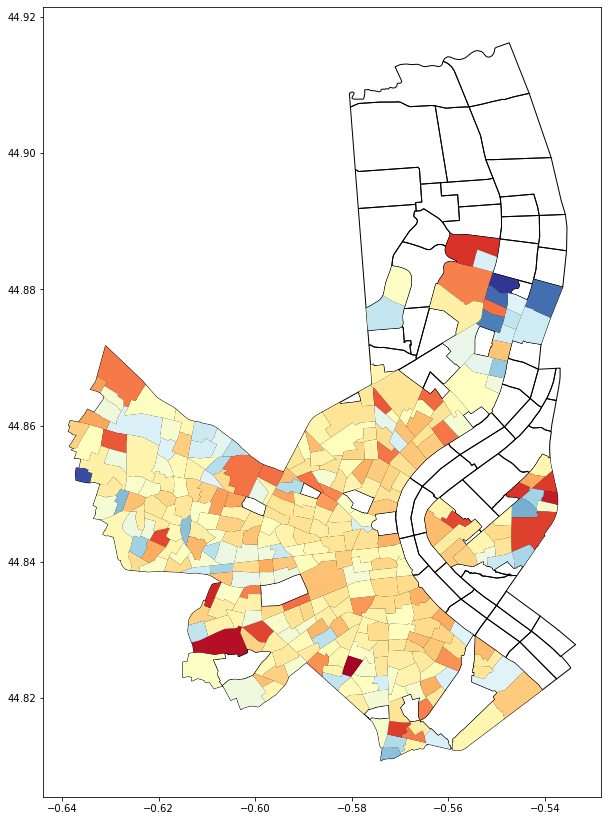

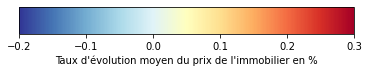

In [44]:
base = bordeaux_sections.plot(edgecolor = 'black', figsize = (10,20), facecolor = 'none') #Fond de carte de cadastre de Bordeaux
a= bordeaux_sections.merge(taux_moyen).plot(column='taux_moyen',colormap = 'RdYlBu_r', ax=base ) #Heatmap de l'évolution des prix du m2
#Création de la légende
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
cmap = mpl.cm.RdYlBu_r
norm = mpl.colors.Normalize(vmin=-0.2, vmax=0.3)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label="Taux d'évolution moyen du prix de l'immobilier en %")

In [45]:
prix_m2_annee = data_json.groupby('year').mean().reset_index()
prix_m2_annee=prix_m2_annee[['year','valeur_m2']]

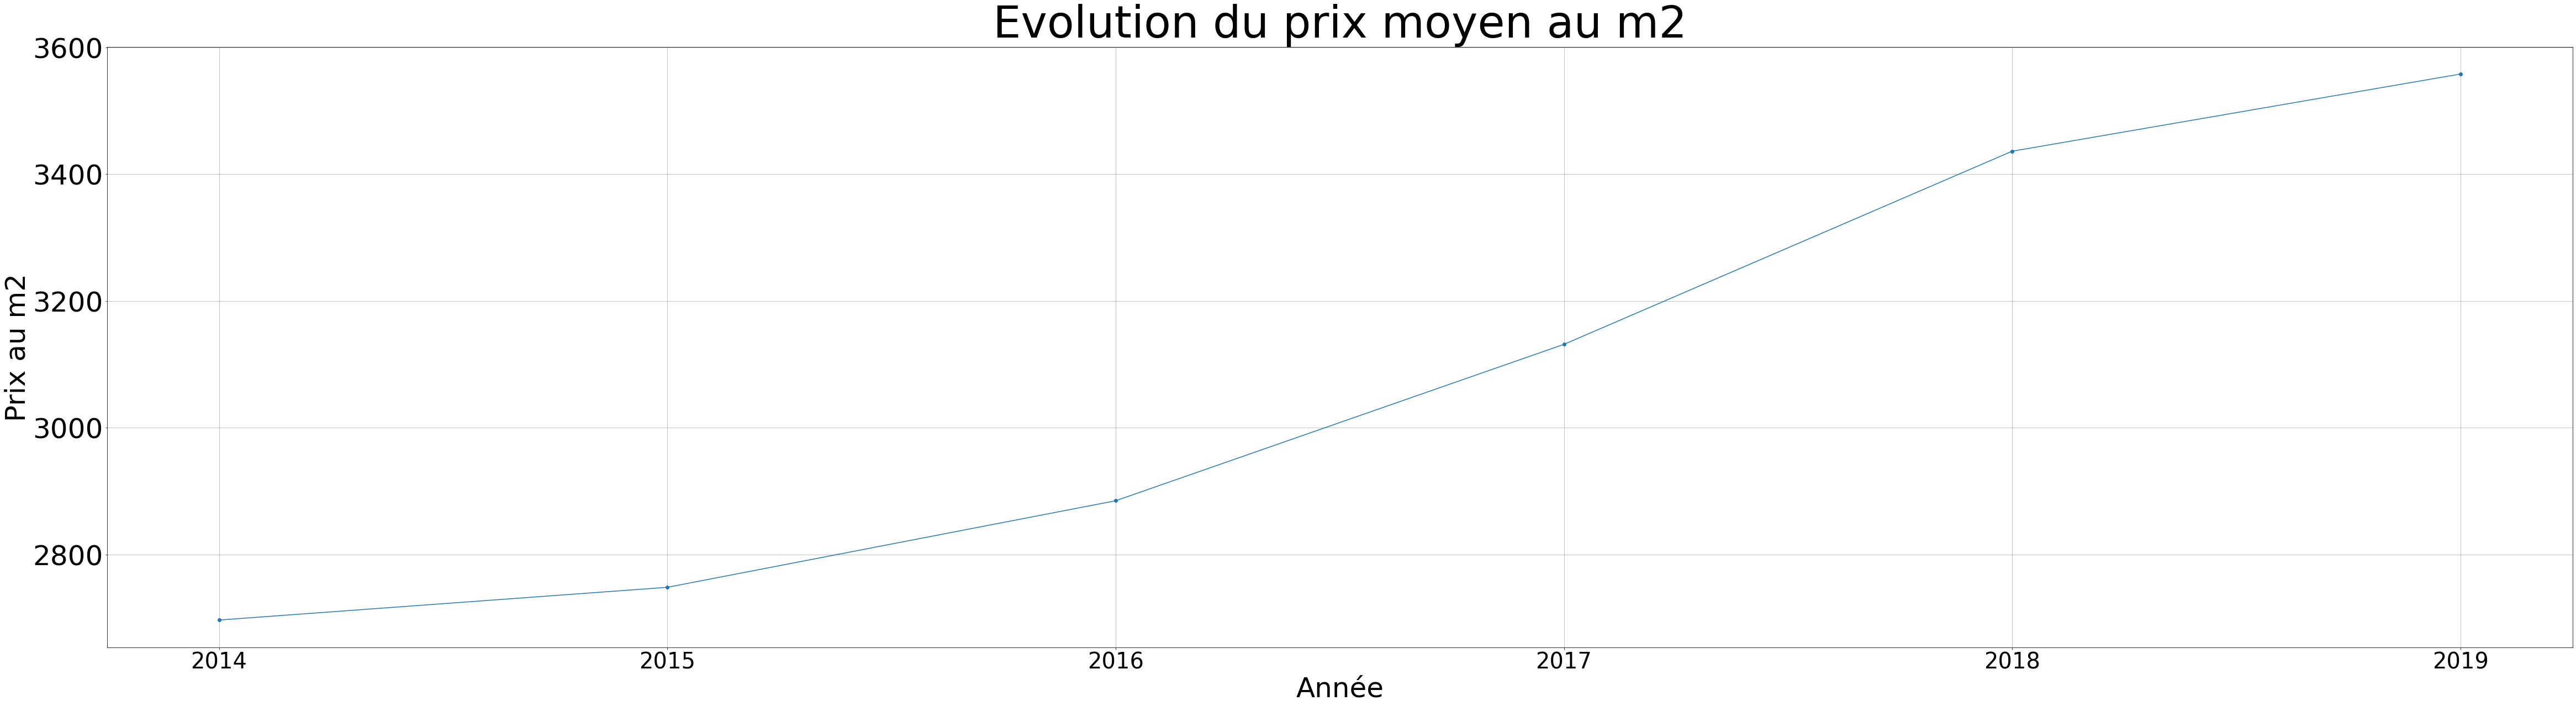

In [46]:
plt.clf
plt.figure(figsize=(80,20))
plt.plot(prix_m2_annee['year'], prix_m2_annee['valeur_m2'],marker='o')

plt.title("Evolution du prix moyen au m2",size = 80)
plt.xlabel('Année', size = 50)
plt.ylabel('Prix au m2', size = 50)
plt.xticks(size=40)
plt.yticks(size = 50)
plt.grid()

In [47]:
# Variable distance par rapport à la gare de Bordeaux
from numpy import sin, cos, sqrt, arctan2, radians
data_json["distance_gare"] = (sin((radians(data_json["lat"])-radians(44.821996712))/2)**2 + cos(radians(data_json["lat"]))*cos(radians(44.821996712))*sin((radians(data_json["lon"])-radians(-0.55333112))/2)**2)
data_json["distance_gare"] = 2 * arctan2(sqrt(data_json["distance_gare"]), sqrt(1 - data_json["distance_gare"])) * 6373
data_json[['distance_gare','numero_voie',"voie",'type_voie']].sort_values("distance_gare")

,distance_gare,numero_voie,voie,type_voie
4279,0.122010,14,EUGENE DELACROIX,ALL
4278,0.122966,20,EUGENE DELACROIX,ALL
4287,0.128151,12,EUGENE DELACROIX,ALL
4281,0.129896,10,EUGENE DELACROIX,ALL
4282,0.129896,10,EUGENE DELACROIX,ALL
...,...,...,...,...
63244,NaN,1,DU DOCTEUR BERT CAUD,RUE
63245,NaN,1,DU DOCTEUR BERT CAUD,RUE
63246,NaN,1,DU DOCTEUR BERT CAUD,RUE
64083,NaN,70,JUDE,RUE


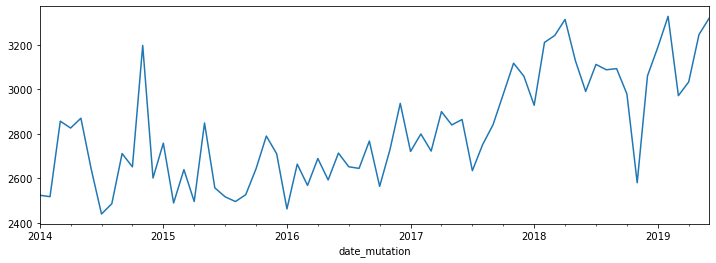

In [48]:
# Données sur un rayon de 2 km
k = 4
data_k = data_json[data_json["distance_gare"]>k][["date_mutation",'valeur_m2']].sort_values("date_mutation")

data_k["date_mutation"] = data_k["date_mutation"].astype('datetime64')

donnee_temporelle = data_k.groupby(data_k['date_mutation'].dt.to_period("M"))['valeur_m2'].mean()
donnee_temporelle.plot(figsize=(12,4))

# 3 ) Modélisation du prix au centre ville de Bordeaux

In [49]:
bordeaux_quartiers = gpd.read_file('https://raw.githubusercontent.com/mdlbm/SNCF-Immobilier/master/se_quart_s.json')
bordeaux_quartiers

,valide,insee,geom_err,nom,quarpoli,cdate,gid,mdate,geometry
0,1,33318,None,Toctoucau,1,2016-03-31T19:45:28+02:00,135.0,2016-12-02T10:36:56+01:00,"POLYGON ((-0.72364 44.78064, -0.72357 44.78069..."
1,1,33318,None,3M-Bourgailh,1,2016-03-31T19:45:28+02:00,116.0,2016-12-02T10:36:36+01:00,"POLYGON ((-0.67911 44.80185, -0.67969 44.80188..."
2,1,33318,None,Saige,1,2016-03-31T19:45:28+02:00,112.0,2016-12-02T10:36:28+01:00,"POLYGON ((-0.62840 44.78518, -0.62856 44.78511..."
3,1,33318,None,Casino,1,2016-03-31T19:45:28+02:00,114.0,2016-12-02T10:36:00+01:00,"POLYGON ((-0.62804 44.80689, -0.62945 44.80649..."
4,1,33281,None,Arlac,1,2016-03-31T19:45:28+02:00,115.0,2017-06-13T10:59:28+02:00,"POLYGON ((-0.62901 44.81440, -0.62908 44.81440..."
5,1,33318,None,Verthamon,1,2016-03-31T19:45:28+02:00,119.0,2016-12-02T10:35:32+01:00,"POLYGON ((-0.60981 44.81343, -0.60954 44.81311..."
6,1,33119,None,Gambetta-Mairie-Lissandre,1,2016-03-31T19:45:28+02:00,123.0,2016-09-22T12:16:12+02:00,"POLYGON ((-0.52934 44.84382, -0.52965 44.84380..."
7,1,33318,None,Cap de Bos,1,2016-03-31T19:45:24+02:00,70.0,2016-12-02T10:36:52+01:00,"POLYGON ((-0.68063 44.79470, -0.67955 44.79464..."
8,1,33281,None,Bourran,1,2016-03-31T19:45:24+02:00,73.0,2017-06-13T10:59:08+02:00,"POLYGON ((-0.63941 44.84279, -0.63954 44.84295..."
9,1,33281,None,Capeyron,1,2016-03-31T19:45:24+02:00,85.0,2017-06-13T10:58:20+02:00,"POLYGON ((-0.66026 44.85745, -0.66012 44.85760..."


In [50]:
geo_data_json_2 = geo_data_json_2[geo_data_json_2.is_valid]
valeurs_quartiers = gpd.sjoin(geo_data_json_2,bordeaux_quartiers, how = 'inner', op='intersects')
valeurs_quartiers = valeurs_quartiers.drop(columns=['valide','insee','geom_err','quarpoli','cdate','mdate'])
valeurs_quartiers.sort_values('valeur_m2')

<ipython-input-50-73314a172765>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  valeurs_quartiers = gpd.sjoin(geo_data_json_2,bordeaux_quartiers, how = 'inner', op='intersects')


,code_commune,code_postal,code_type_local,type_local,surface_relle_bati,surface_terrain,nombre_pieces_principales,section,lon,lat,...,valeur_fonciere,occurence,surface_immeuble,surface_terrain_effective,valeur_m2,year,geometry,index_right,nom,gid
46,33063,33100,1,Maison,71.0,154.0,2.0,AE,-0.539600,44.854550,...,225115.00,1,71.0,154.0,1000.511111,2015,POINT (-0.53960 44.85455),11,La Bastide,101.0
55211,33063,33300,2,Appartement,70.0,0.0,3.0,SA,-0.550911,44.864718,...,783989.53,24,783.0,0.0,1001.263768,2014,POINT (-0.55091 44.86472),17,Bordeaux Maritime,122.0
55210,33063,33300,2,Appartement,63.0,0.0,3.0,SA,-0.550911,44.864718,...,783989.53,24,783.0,0.0,1001.263768,2014,POINT (-0.55091 44.86472),17,Bordeaux Maritime,122.0
55209,33063,33300,3,Dépendance,0.0,0.0,0.0,SA,-0.550911,44.864718,...,783989.53,24,783.0,0.0,1001.263768,2014,POINT (-0.55091 44.86472),17,Bordeaux Maritime,122.0
55194,33063,33300,3,Dépendance,0.0,0.0,0.0,SA,-0.550911,44.864718,...,783989.53,24,783.0,0.0,1001.263768,2014,POINT (-0.55091 44.86472),17,Bordeaux Maritime,122.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32197,33063,33000,3,Dépendance,0.0,0.0,0.0,KV,-0.582954,44.844104,...,1160000.00,4,166.0,0.0,6987.951807,2019,POINT (-0.58295 44.84410),32,Centre ville,83.0
29640,33063,33000,3,Dépendance,0.0,0.0,0.0,KL,-0.570542,44.838707,...,97860.00,2,14.0,0.0,6990.000000,2017,POINT (-0.57054 44.83871),32,Centre ville,83.0
29639,33063,33000,2,Appartement,14.0,0.0,1.0,KL,-0.570542,44.838707,...,97860.00,2,14.0,0.0,6990.000000,2017,POINT (-0.57054 44.83871),32,Centre ville,83.0
29235,33063,33000,2,Appartement,39.0,0.0,2.0,KJ,-0.571495,44.840243,...,272800.00,1,39.0,0.0,6994.871795,2017,POINT (-0.57149 44.84024),32,Centre ville,83.0


In [51]:
centre_ville = valeurs_quartiers[valeurs_quartiers['gid']==83.0]#Il y a deux quartiers centre-ville, celui de BOrdeaux est associé à un gid = 83.0

In [55]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
regression_cv = centre_ville[['valeur_m2','code_type_local', 'surface_relle_bati','surface_terrain_effective', 'nombre_pieces_principales']].astype(np.float64)
regression_cv

,valeur_m2,code_type_local,surface_relle_bati,surface_terrain_effective,nombre_pieces_principales
76,1526.315789,2.0,30.0,0.0,1.0
242,1733.333333,3.0,0.0,0.0,0.0
243,1733.333333,3.0,0.0,0.0,0.0
244,1733.333333,2.0,30.0,0.0,1.0
254,1486.486486,2.0,42.0,0.0,2.0
...,...,...,...,...,...
36858,3490.909091,2.0,55.0,0.0,3.0
36859,3490.909091,3.0,0.0,0.0,0.0
36860,2304.854369,2.0,48.0,0.0,3.0
36861,2304.854369,3.0,0.0,0.0,0.0


In [56]:
results = sm.OLS(regression_cv[['valeur_m2']], regression_cv.drop(['valeur_m2'], axis = 1)).fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              valeur_m2   R-squared (uncentered):                   0.836
Model:                            OLS   Adj. R-squared (uncentered):              0.836
Method:                 Least Squares   F-statistic:                          1.231e+04
Date:                Sat, 12 Dec 2020   Prob (F-statistic):                        0.00
Time:                        14:44:14   Log-Likelihood:                         -84424.
No. Observations:                9644   AIC:                                  1.689e+05
Df Residuals:                    9640   BIC:                                  1.689e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [57]:
results_2 = smf.ols('valeur_m2 ~ code_type_local + surface_relle_bati + surface_terrain_effective + nombre_pieces_principales', data=regression_cv).fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:              valeur_m2   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     173.9
Date:                Sat, 12 Dec 2020   Prob (F-statistic):          4.54e-144
Time:                        14:44:17   Log-Likelihood:                -83361.
No. Observations:                9644   AIC:                         1.667e+05
Df Residuals:                    9639   BIC:                         1.668e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [58]:
results = sm.RLM(regression_cv[['valeur_m2']], regression_cv.drop(['valeur_m2'], axis = 1),M=sm.robust.norms.LeastSquares()).fit()

print(results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:              valeur_m2   No. Observations:                 9644
Model:                            RLM   Df Residuals:                     9640
Method:                          IRLS   Df Model:                            3
Norm:                    LeastSquares                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 12 Dec 2020                                         
Time:                        14:44:19                                         
No. Iterations:                     2                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
code_type_local       

In [59]:
results_2 = smf.rlm('valeur_m2 ~ code_type_local + surface_relle_bati + surface_terrain_effective + nombre_pieces_principales', data=regression_cv,M=sm.robust.norms.LeastSquares() ).fit()
print(results_2.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:              valeur_m2   No. Observations:                 9644
Model:                            RLM   Df Residuals:                     9639
Method:                          IRLS   Df Model:                            4
Norm:                    LeastSquares                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 12 Dec 2020                                         
Time:                        14:44:21                                         
No. Iterations:                     2                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             